In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [21]:

import nltk



In [ ]:
nltk.download('stopwords')

In [3]:
df = pd.read_csv("newsCorpora.csv",delimiter='\t',header=None)
df.columns = ['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP']
df.to_csv('newsfeed.csv')

In [4]:
df = pd.read_csv("newsfeed.csv")

In [5]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [6]:
df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [7]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='ms')

In [24]:
pd.set_option('display.max_colwidth', -1)
df.head()

ID                                                                  TITLE  \
0  1   Fed official says weak data caused by weather, should not slow taper    
1  2   Fed's Charles Plosser sees high bar for change in pace of tapering      
2  3   US open: Stocks fall after Fed official hints at accelerated tapering   
3  4   Fed risks falling 'behind the curve', Charles Plosser says              
4  5   Fed's Plosser: Nasty Weather Has Curbed Job Growth                      

                                                                                                                           URL  \
0  http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html      
2  http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436                   
3  http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430                                
4  http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011                      

           PUBLISHER CATEGORY                          STORY  \
0  Los Angeles Times  b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
1  Livemint           b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
2  IFA Magazine       b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
3  IFA Magazine       b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
4  Moneynews          b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   

              HOSTNAME               TIMESTAMP  \
0  www.latimes.com     2014-03-10 16:52:50.698   
1  www.livemint.com    2014-03-10 16:52:51.207   
2  www.ifamagazine.com 2014-03-10 16:52:51.550   
3  www.ifamagazine.com 2014-03-10 16:52:51.793   
4  www.moneynews.com   2014-03-10 16:52:52.027   

                                                 TITLENEW  
0  fed official weak data caused weather slow taper        
1  fed charles plosser see high bar change pace tapering   
2  open stock fall fed official hint accelerated tapering  
3  fed risk falling behind curve charles plosser           
4  fed plosser nasty weather curbed job growth

In [10]:
df['TITLENEW'] = df['TITLE'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
df['TITLENEW'] = df['TITLENEW'].str.replace('[^\w\s]','')

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['TITLENEW'] = df['TITLENEW'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
freq = pd.Series(' '.join(df['TITLENEW']).split()).value_counts()[:10]
freq

new        24230
us         18630
google     11164
video       9502
2014        9329
says        9051
apple       8870
first       7961
may         7760
samsung     7579
dtype: int64

In [15]:
freq = list(freq.index)
df['TITLENEW'] = df['TITLENEW'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [17]:
freq = pd.Series(' '.join(df['TITLENEW']).split()).value_counts()[-10:]
freq

billionpound     1
piethrowing      1
leafcutterbee    1
discontinuity    1
gandel           1
sciencetech      1
9state           1
mercedesmaker    1
fringed          1
اے               1
dtype: int64

In [ ]:
from textblob import TextBlob
df['TITLENEW'][:].apply(lambda x: str(TextBlob(x).correct()))

In [20]:
TextBlob(df['TITLENEW'][1]).words

WordList(['feds', 'charles', 'plosser', 'sees', 'high', 'bar', 'change', 'pace', 'tapering'])

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['TITLENEW'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [22]:
from textblob import Word
df['TITLENEW'] = df['TITLENEW'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['TITLENEW'].head()

0     fed official weak data caused weather slow taper
1    fed charles plosser see high bar change pace t...
2    open stock fall fed official hint accelerated ...
3        fed risk falling behind curve charles plosser
4          fed plosser nasty weather curbed job growth
Name: TITLENEW, dtype: object

In [34]:
df.head()

ID                                                                  TITLE  \
0  1   Fed official says weak data caused by weather, should not slow taper    
1  2   Fed's Charles Plosser sees high bar for change in pace of tapering      
2  3   US open: Stocks fall after Fed official hints at accelerated tapering   
3  4   Fed risks falling 'behind the curve', Charles Plosser says              
4  5   Fed's Plosser: Nasty Weather Has Curbed Job Growth                      

                                                                                                                           URL  \
0  http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html      
2  http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436                   
3  http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430                                
4  http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011                      

           PUBLISHER CATEGORY                          STORY  \
0  Los Angeles Times  b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
1  Livemint           b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
2  IFA Magazine       b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
3  IFA Magazine       b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   
4  Moneynews          b        ddUyU0VZz0BRneMioxUPQVP6sIxvM   

              HOSTNAME               TIMESTAMP  \
0  www.latimes.com     2014-03-10 16:52:50.698   
1  www.livemint.com    2014-03-10 16:52:51.207   
2  www.ifamagazine.com 2014-03-10 16:52:51.550   
3  www.ifamagazine.com 2014-03-10 16:52:51.793   
4  www.moneynews.com   2014-03-10 16:52:52.027   

                                                 TITLENEW  
0  fed official weak data caused weather slow taper        
1  fed charles plosser see high bar change pace tapering   
2  open stock fall fed official hint accelerated tapering  
3  fed risk falling behind curve charles plosser           
4  fed plosser nasty weather curbed job growth

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [132]:
Random.groupby('CATEGORY').ID.count()

CATEGORY
b    518
e    712
m    223
t    547
Name: ID, dtype: int64

In [29]:
publisherdf =df.groupby("PUBLISHER").ID.count()

In [30]:
df['PUBLISHER'].nunique()

10985

In [36]:
def emphasize(s):
    red = '\x1b[1;31m'
    stop = '\x1b[0m'
    return red + str(s) + stop

nunique = Random['PUBLISHER'].nunique()

from collections import Counter
for key, value in Counter(Random['PUBLISHER']).most_common(5):
    print("   {} posted {} articles".format(emphasize(key), emphasize(value)))

   CBS Local posted 13 articles
   Examiner.com posted 13 articles
   Reuters posted 12 articles
   Contactmusic.com posted 11 articles
   Businessweek posted 11 articles


In [29]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string 
import nltk
import re

In [35]:
Random=df.sample(n = 2000) 

In [149]:
Random['CATEGORY'].value_counts()

e    712
t    547
b    518
m    223
Name: CATEGORY, dtype: int64

In [33]:
df=df.drop(columns=['Test'],axis=1)

In [90]:
bus=Random.reset_index()

In [92]:
norm_corpus = normalize_corpus(bus['TITLENEW'])
norm_corpus

array(['lindsay lohan take role originally played madonna',
       'carl icahn slam ebay ceo',
       'vmas nicki minajs wardrobe malfunction', ...,
       'supersized celestial', 'posted imaduddin',
       'pfizers astrazeneca bid miliband want national interest probe'],
      dtype='<U78')

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

aaliyah  aapl  aaron  abbvie  abc  abe  abilene  aborted  abrams  \
0     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
2     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
3     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
4     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
5     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
6     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
7     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
8     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
9     0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
10    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
11    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
12    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
13    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
14    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
15    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
16    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
17    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
18    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
19    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
20    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
21    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
22    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
23    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
24    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
25    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
26    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
27    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
28    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
29    0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
...   ...      ...   ...    ...     ...  ...  ...      ...      ...      
1970  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1971  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1972  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1973  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1974  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1975  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1976  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1977  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1978  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1979  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1980  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1981  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1982  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1983  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1984  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1985  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1986  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1987  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1988  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1989  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1990  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1991  0.0      0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0      
1992  0.0 

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

0    1    2         3         4         5         6         7  \
0     1.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  1.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.0  1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.0  0.0  1.000000  0.067895  0.000000  0.000000  0.000000   
4     0.000000  0.0  0.0  0.067895  1.000000  0.000000  0.000000  0.000000   
5     0.000000  0.0  0.0  0.000000  0.000000  1.000000  0.000000  0.000000   
6     0.000000  0.0  0.0  0.000000  0.000000  0.000000  1.000000  0.000000   
7     0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  1.000000   
8     0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
9     0.000000  0.0  0.0  0.086037  0.079665  0.000000  0.000000  0.000000   
10    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
11    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
13    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
14    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
15    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
16    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
17    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
18    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
19    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
20    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
21    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
22    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
23    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
24    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.309607  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
26    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
27    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
28    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
29    0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...  ...  ...       ...       ...       ...       ...       ...   
1970  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1971  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.096674   
1972  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1973  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1974  0.000000  0.0  0.0  0.000000  0.000000  0.083814  0.000000  0.000000   
1975  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.114819   
1976  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1977  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1978  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1979  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1980  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1981  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1982  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1983  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1984  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1985  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1986  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1987  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1988  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1989  0.000000  0.0  0.0  0.000000 

In [111]:
sim['simscore']=pd.DataFrame(similarity_df.loc[:,0])

In [67]:
sim=sim.drop(columns=[0],axis=1)

In [119]:
simsort=sim.sort_values(['simscore'],ascending=[False])[:10]

In [120]:
simsort

simscore
0     1.000000
1115  0.342935
25    0.309607
1870  0.248902
533   0.231664
1344  0.216323
915   0.215716
890   0.213341
1244  0.207611
1397  0.200906

In [125]:
merge=pd.concat([bus, sim], axis=1)

In [147]:
merge[['ID','TITLENEW','simscore','polarity','PUBLISHER']].sort_values(['simscore'],ascending=[False])[:10]

ID                                                      TITLENEW  \
0     325555  lindsay lohan take role originally played madonna              
1115  352482  lindsay lohan sue game                                         
25    73135   lindsay lohan almost avenger                                   
1870  135254  lindsay lohan felt humiliated sex list                         
533   354839  lindsay lohan sue rockstar allegedly using likeness            
1344  352378  lindsay lohan sue gta 5 make taketwo stolen likeness           
915   26760   gossip lindsay lohan hooked ashton kutcher orlando             
890   11161   lindsay lohan alleged sex partner list publicly surface        
1244  389472  lindsay lohan strip bikini fall cocktail dress film festival   
1397  135316  lindsay lohan get dropped oprah poor rating trashy sex         

      simscore  polarity                 PUBLISHER  
0     1.000000  0.375     Television Week \(blog\)  
1115  0.342935 -0.400     KWTX                      
25    0.309607  0.000     A.V. Club \(blog\)        
1870  0.248902  0.000     TV3.ie                    
533   0.231664 -0.100     Eurogamer.net             
1344  0.216323  0.000     Huffington Post UK        
915   0.215716  0.000     411mania.com              
890   0.213341 -0.050     Reality TV World          
1244  0.207611  0.000     Us Magazine               
1397  0.200906 -0.400     The Hot Hits

In [134]:
from textblob import TextBlob

In [140]:
merge['polarity'] = merge['TITLENEW'].apply(lambda TITLENEW: TextBlob(TITLENEW).sentiment.polarity)

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

Document\Cluster 1 Document\Cluster 2 Distance Cluster Size
0                  1920               1927        0            2
1                  1853               1855        0            2
2                  1017               1033        0            2
3                  1562               1568        0            2
4                   842                893        0            2
5                   944                950        0            2
6                   615                636        0            2
7                  1020               1110        0            2
8                    16                 20        0            2
9                  1769               1770        0            2
10                  334                342        0            2
11                   51                490        0            2
12                 1012               1019        0            2
13                 1500               1503        0            2
14                  573                575        0            2
15                 1486               1530        0            2
16                  743               1512        0            2
17                 1421               1429        0            2
18                  217                221        0            2
19                  218                240        0            2
20                  210                233        0            2
21                  199                209        0            2
22                  202                213        0            2
23                  906                911        0            2
24                  176                181        0            2
25                  783                789        0            2
26                  967                970        0            2
27                  687                702        0            2
28                  935                936        0            2
29                   81                 88        0            2
...                 ...                ...      ...          ...
1969               3921               3960  10.1995          110
1970               3864               3965  10.2883          638
1971               3950               3958  10.5001          161
1972               3815               3817  10.5286           72
1973               3915               3936  10.6691           62
1974               3797               3970  10.8706          665
1975               3858               3974  11.1014          691
1976               3959               3975  11.3944          788
1977               3923               3976  11.7359          808
1978               3932               3977  12.0888          823
1979               3919               3978   12.493          861
1980               3909               3971   12.521          180
1981               3866               3979  13.7517          888
1982               3779               3972  13.7771           94
1983               3900               3981  13.8956          909
1984               3951               3980  14.2307          201
1985               3912               3967  14.2345           75
1986               3780               3982  15.9581          123
1987               3966               3983  16.1562         1067
1988               3846               3987  16.2236         1092
1989               3986               3988  17.4261         1215
1990               3954               3989  17.8557         1263
1991               3964               3990  17.9919         1346
1992               3938               3991  18.6295         1399
1993               3934               3992  22.8693         1441
1994               3973               3985  22.9904          137
1995               3984               3993  29.2291         1642
1996               3994               3995   33.312         1779
1997               3969               3996   34.959         1889
1998               3968               39

In [118]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


T1        T2        T3
0     0.033755  0.924234  0.042011
1     0.034435  0.929031  0.036534
2     0.033590  0.932883  0.033526
3     0.038065  0.923552  0.038383
4     0.041846  0.693348  0.264806
5     0.048332  0.903470  0.048198
6     0.048305  0.903518  0.048177
7     0.041751  0.914578  0.043671
8     0.167037  0.648389  0.184574
9     0.048879  0.042995  0.908127
10    0.048879  0.042995  0.908127
11    0.246561  0.703294  0.050145
12    0.296620  0.513516  0.189865
13    0.924574  0.041272  0.034154
14    0.054310  0.047688  0.898003
15    0.055221  0.894663  0.050116
16    0.361479  0.599255  0.039266
17    0.154626  0.664333  0.181042
18    0.702938  0.248909  0.048153
19    0.295638  0.670130  0.034232
20    0.361479  0.599255  0.039266
21    0.350542  0.611813  0.037645
22    0.939071  0.030341  0.030588
23    0.033468  0.930375  0.036157
24    0.066762  0.067557  0.865681
25    0.891441  0.060358  0.048201
26    0.043872  0.043162  0.912966
27    0.932426  0.033486  0.034088
28    0.036295  0.927880  0.035824
29    0.939032  0.030359  0.030609
...        ...       ...       ...
1970  0.790943  0.166601  0.042456
1971  0.924837  0.037321  0.037842
1972  0.904730  0.047634  0.047636
1973  0.364822  0.607361  0.027817
1974  0.932486  0.033687  0.033827
1975  0.866437  0.066771  0.066792
1976  0.834138  0.130329  0.035533
1977  0.135443  0.831083  0.033475
1978  0.916202  0.041676  0.042122
1979  0.916636  0.041679  0.041685
1980  0.924974  0.037060  0.037965
1981  0.752254  0.219780  0.027966
1982  0.926331  0.038306  0.035363
1983  0.916629  0.041684  0.041686
1984  0.916451  0.041699  0.041850
1985  0.924930  0.037078  0.037992
1986  0.904125  0.047639  0.048236
1987  0.888868  0.055565  0.055567
1988  0.305668  0.041777  0.652556
1989  0.169068  0.041808  0.789124
1990  0.904114  0.047965  0.047922
1991  0.916551  0.041720  0.041729
1992  0.916450  0.041672  0.041878
1993  0.833087  0.083446  0.083468
1994  0.888244  0.055666  0.056090
1995  0.915966  0.041840  0.042194
1996  0.343921  0.047796  0.608282
1997  0.904411  0.047653  0.047937
1998  0.047645  0.902448  0.049907
1999  0.925136  0.037052  0.037812

[2000 rows x 3 columns]

In [119]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('bank', 114.88059074339952), ('colorado', 109.73210311614699), ('chiquita', 91.0986216432405), ('banana', 79.38799954274447), ('fyffes', 69.62847187988623), ('marijuana', 61.87638718712787), ('mens', 61.36123199557801), ('pot', 60.89860533376053), ('million', 59.49092201473699), ('taxes', 58.94537244719443), ('wearhouse', 58.239151260319595), ('jos', 58.235989189492926), ('fannie', 56.05647087321359), ('sales', 47.94681662017061), ('freddie', 47.257516261070705), ('merger', 46.38775041070628), ('public', 45.182650946798), ('billion', 42.32203397085899), ('month', 39.382979286425446), ('england', 38.41585191389522), ('transit', 38.36572485555993), ('first', 37.40420661666854), ('worlds', 35.4723323017592), ('deal', 35.46295064125984), ('top', 34.46586679736758), ('loss', 31.18620436246717), ('recreational', 29.639197436514863), ('carney', 29.42173654613359), ('tax', 28.661304448155978), ('record', 28.42935043474984), ('unicredit', 25.71345977947097), ('merge', 25.32206186626313), ('bi

In [127]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
result=pd.concat([df, cluster_labels], axis=1)

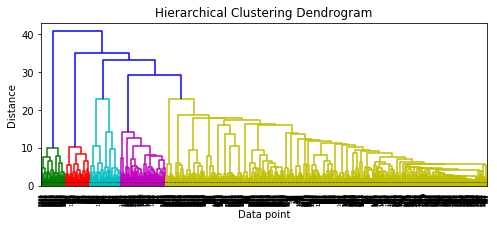

In [116]:
%matplotlib inline
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [146]:
result.head()

ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PUBLISHER  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  CATEGORY                          STORY             HOSTNAME  \
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com   
1        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM     www.livemint.com   
2        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM  www.ifamagazine.com   
3        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM  www.ifamagazine.com   
4        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM    www.moneynews.com   

                TIMESTAMP                                             tokens  \
0 2014-03-10 16:52:50.698  [Fed, official, says, weak, data, caused, by, ...   
1 2014-03-10 16:52:51.207  [Fed, s, Charles, Plosser, sees, high, bar, fo...   
2 2014-03-10 16:52:51.550  [US, open, Stocks, fall, after, Fed, official,...   
3 2014-03-10 16:52:51.793  [Fed, risks, falling, behind, the, curve, Char...   
4 2014-03-10 16:52:52.027  [Fed, s, Plosser, Nasty, Weather, Has, Curbed,...   

                                                Test ClusterLabel  
0  [fed, official, say, weak, data, caused, weath...        Stock  
1  [fed, 's, charles, plosser, see, high, bar, ch...        Stock  
2  [u, open, stock, fall, fed, official, hint, ac...        Stock  
3  [fed, risk, falling, 'behind, curve, charles, ...        Stock  
4  [fed, 's, plosser, nasty, weather, curbed, job...        Stock

In [142]:
result.ClusterLabel.replace({0.0:'Stock',1.0:'Banking',2.0:'Industry',3.0:'Others'},inplace=True)

In [ ]:

result.ClusterLabel.replace({"0.0":"PRICE","1.0":"STOCK","low fat":"Low Fat"},inplace=True)